# <div align=center>相关分析方法</div>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_10000 = pd.read_csv("~/Datasets/Statistics/weight-height.csv")

df_males = df_10000[df_10000.Gender=='Male']
df_males[:10]

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [3]:
df_males.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 3 columns):
Gender    5000 non-null object
Height    5000 non-null float64
Weight    5000 non-null float64
dtypes: float64(2), object(1)
memory usage: 156.2+ KB


In [4]:
ss_males_height = df_males['Height']
ss_males_weight = df_males['Weight']

In [5]:
ss_males_height.describe()

count    5000.000000
mean       69.026346
std         2.863362
min        58.406905
25%        67.174679
50%        69.027709
75%        70.988744
max        78.998742
Name: Height, dtype: float64

In [6]:
ss_males_weight.describe()

count    5000.000000
mean      187.020621
std        19.781155
min       112.902939
25%       173.887767
50%       187.033546
75%       200.357802
max       269.989699
Name: Weight, dtype: float64

## 1. 图表

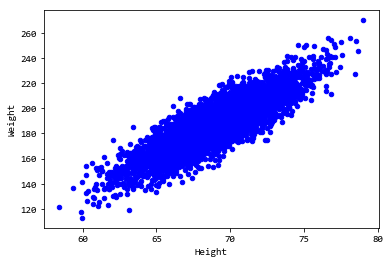

In [7]:
df_males.plot.scatter(x='Height', y='Weight', c='b')

### 总结

- 优点: 清晰
    
- 缺点: 不能准确度量

## 2.协方差

In [8]:
np.cov(ss_males_height, ss_males_weight, rowvar=0, bias=False)
#            Height   Weight
#  Height  cov(0, 0)  cov(0, 1)
#  Weight  cov(1, 0)  cov(1, 1)

array([[  8.19884325,  48.87964899],
       [ 48.87964899, 391.29407402]])

### 总结

- 优点: 通过正负可以知道相关性
 
- 缺点: 多变量的单位不同, 不同通过数字决定相关程度

## 3.相关系数

In [9]:
# DataFrame.corr输出的是"系数矩阵"
df_corr_rect = df_males.corr()
df_corr_rect 

,Height,Weight
Height,1.000000,0.862979
Weight,0.862979,1.000000


In [10]:
# Series.corr可以指定某变量和其他变量或多个变量的相关系数, 本例只有两个变量
ss_males_height.corr(ss_males_weight, method='pearson')

0.8629788486163148

In [11]:
ss_males_height.corr(ss_males_weight, method='spearman')

0.8485589833503592

In [12]:
ss_males_height.corr(ss_males_weight, method='kendall')

0.6593137827565513

### 总结

- 优点: 使用具体数字度量, 有方向性

- 缺点: 不能预测

pearson: 皮尔逊相关系数, 两个连续型随机变量

spearman: 斯皮尔曼相关系数, 分类定序变量

kendall: 肯德尔相关系数, 秩相关系数, 分类变量


## 4.回归

In [13]:
# 自由度=1, 多项式系数系数
nd_fit_coef = np.polyfit(ss_males_height, ss_males_weight, deg=1)
# y = ax + b
nd_fit_coef

array([   5.96177381, -224.49884071])

In [14]:
p1d_call = np.poly1d(nd_fit_coef)
# numpy.lib.polynomial.poly1d
type(p1d_call )
# 输出方程式
print(p1d_call)

 
5.962 x - 224.5


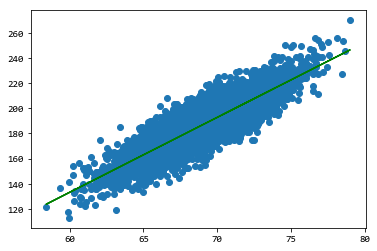

In [15]:
plt.scatter(ss_males_height, ss_males_weight)
plt.plot(ss_males_height, p1d_call(ss_males_height), 'g')

### 总结

- 优点: 可以计算出各自变量对因变量的影响系数

## 5.信息熵